In [1]:
# import networkx as nx

#!conda install osmnx=1.9.* -y
# osmnx 1.9 or greater for Shapely version 2 
# import shapely
# print("Shapely version:", shapely.__version__)

# https://osmnx.readthedocs.io/en/stable/getting-started.html

In [2]:
import networkx as nx
import geopandas as gp
from shapely.geometry import Polygon, MultiPolygon
import osmnx as ox
import os
from stat import S_ISDIR

ox.settings.use_cache = True

In [3]:
print("OSMNx version:", ox.__version__)

OSMNx version: 1.9.2


<Axes: >

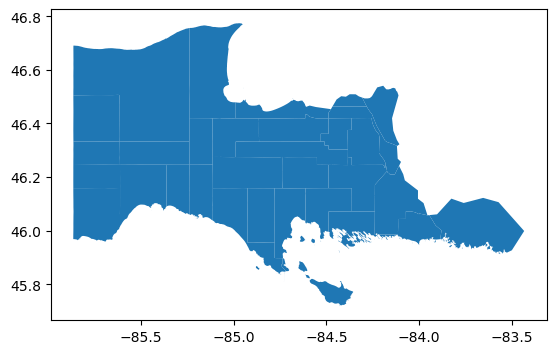

In [4]:
EUP_gdf = gp.read_file('../DATA/EUPPlanning_Region.shp.zip')
EUPCounties_gdf = gp.read_file('../DATA/EUPCounties.shp.zip')
EUPTowns_gdf = gp.read_file('../DATA/EUPTowns.shp.zip')
EUPTowns_gdf.plot()

In [5]:
EUPTowns_gdf

,OBJECTID,FIPSCODE,FIPSNUM,NAME,LABEL,TYPE,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,ShapeSTAre,ShapeSTLen,geometry
0,156,86700,86700,Whitefish,Whitefish Township,Township,636.691918,245.826995,157328.305068,20,portrait,upper,6.366919e+08,127804.341492,"POLYGON ((-84.98926 46.47816, -84.98928 46.477..."
1,157,77020,77020,Sugar Island,Sugar Island Township,Township,198.406177,76.604702,49026.706184,20,portrait,upper,1.984062e+08,68523.322539,"POLYGON ((-84.11942 46.31516, -84.12186 46.316..."
2,158,06070,6070,Bay Mills,Bay Mills Township,Township,201.455193,77.781928,49780.126269,20,landscape,upper,2.014552e+08,100988.905151,"MULTIPOLYGON (((-84.47575 46.45288, -84.47943 ..."
3,159,74620,74620,Soo,Soo Township,Township,175.633099,67.812007,43399.416538,20,landscape,upper,1.756331e+08,99898.197083,"POLYGON ((-84.11942 46.31516, -84.11973 46.315..."
4,160,77540,77540,Superior,Superior Township,Township,271.049014,104.652129,66976.948740,20,landscape,upper,2.710490e+08,79311.792884,"POLYGON ((-84.48895 46.41883, -84.48893 46.417..."
5,161,11280,11280,Bruce,Bruce Township,Township,234.703035,90.618932,57995.758467,20,portrait,upper,2.347030e+08,69213.559894,"POLYGON ((-84.17977 46.24512, -84.18376 46.245..."
6,162,19540,19540,Dafter,Dafter Township,Township,124.101187,47.915516,30665.740849,20,portrait,upper,1.241012e+08,51596.553276,"POLYGON ((-84.38423 46.30256, -84.39972 46.302..."
7,163,15560,15560,Chippewa,Chippewa Township,Township,247.221189,95.452197,61089.028498,20,landscape,upper,2.472212e+08,71065.847617,"POLYGON ((-84.86445 46.41838, -84.86443 46.416..."
8,164,39860,39860,Hulbert,Hulbert Township,Township,185.809868,71.741262,45914.123962,20,portrait,upper,1.858099e+08,57791.411043,"POLYGON ((-85.11459 46.41893, -85.11458 46.411..."
9,165,43480,43480,Kinross,Kinross Township,Township,313.072212,120.877302,77360.995337,20,landscape,upper,3.130722e+08,112747.999289,"POLYGON ((-84.38423 46.30256, -84.38396 46.296..."


In [6]:

coords_list = []
multicoords_list = []
for index, row in EUP_gdf.iterrows():
    geom = row['geometry']

    if geom.geom_type == 'Polygon':
        # Do something for Polygon
        print(f'Polygon found at index {index}')
        coords_list.append(Polygon(list(geom.exterior.coords)))
        
    elif geom.geom_type == 'MultiPolygon':
        # Do something else for MultiPolygon
        multicoords_list = []
        print(f'MultiPolygon found at index {index}')
        geoms = list(geom.geoms)
        print(len(geoms))
        # Use list comprehension to get the exterior coordinates for each Polygon
        multicoords_list.append([Polygon(list(geom.exterior.coords)) for geom in geoms if geom.geom_type == 'Polygon'])
        for c in multicoords_list:
            print(len(c))
            for coord in c:
                coords_list.append(coord)
                #print(coord)

#polygons = [Polygon(coords) for coords in coords_list]

MultiPolygon found at index 0
150
150


In [8]:
# Polygon(list(polygon.exterior.coords))

In [82]:
# individual_polygons = multipolygon.geoms

In [147]:
individual_polygons

In [115]:
exterior_ring = individual_polygons[12].exterior

exterior_ring

In [111]:
single_polygon = Polygon(exterior_ring)

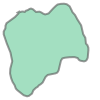

In [112]:
single_polygon

In [67]:
EUP_gdf = EUP_gdf.loc[0, 'geometry']
#EUP_gdf = EUP_gdf.dissolve()

In [53]:
merged_polygon = EUP_gdf.buffer(0)

In [9]:
EUP_gdf.geometry

0    MULTIPOLYGON Z (((-83.64068 45.95005 0.00000, ...
Name: geometry, dtype: geometry

In [19]:
G4 = nx.Graph()
i = 0
for polygon in coords_list:
    exterior_ring = polygon.exterior
    print(i)
    #gp.GeoSeries([exterior_ring]).plot()
    try:
        if G4:
            G3 = ox.graph_from_polygon(Polygon(exterior_ring), network_type='drive_service', simplify=True, retain_all=True, truncate_by_edge=False, custom_filter=None)

            # Merge G3 and G4 into a new graph G4
            G4 = nx.compose(G4, G3)
            print(f"success inside {i}")
            pass
        else:
            G4 = ox.graph_from_polygon(Polygon(exterior_ring), network_type='drive_service', simplify=True, retain_all=True, truncate_by_edge=False, custom_filter=None)
            print(f"success outside {i}")
        # Process the graph G2 as needed
    except ValueError as e:
        print(f"Error processing polygon: {e} {i}")
        # Handle the error (e.g., log it, skip this polygon, etc.)
    except nx.NetworkXPointlessConcept as npce:
        print(f"NetworkXPointlessConcept: {npce}")
        # Handle the NetworkXPointlessConcept (e.g., log it, skip this polygon, etc.)
    i += 1


0
success outside 0
1
success inside 1
2
success inside 2
3
success inside 3
4
Error processing polygon: Found no graph nodes within the requested polygon 4
5
Error processing polygon: No data elements in server response. Check query location/filters and log. 5
6
Error processing polygon: No data elements in server response. Check query location/filters and log. 6
7
Error processing polygon: No data elements in server response. Check query location/filters and log. 7
8
Error processing polygon: No data elements in server response. Check query location/filters and log. 8
9
Error processing polygon: No data elements in server response. Check query location/filters and log. 9
10
Error processing polygon: Found no graph nodes within the requested polygon 10
11
success inside 11
12
Error processing polygon: No data elements in server response. Check query location/filters and log. 12
13
Error processing polygon: No data elements in server response. Check query location/filters and log. 13
1

In [20]:
G4

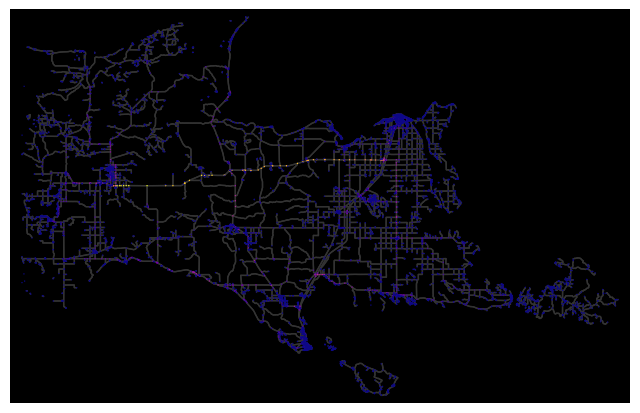

In [21]:
# Sample Code from NetworkX documentation - updated for 1.9 version of osmnx


# download street network data from OSM and construct a MultiDiGraph model
#G = ox.graph.graph_from_point((46.235020, -84.557648), dist=75000, network_type="drive")
G = G4
# impute edge (driving) speeds and calculate edge travel times
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

# you can convert MultiDiGraph to/from GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
G = ox.convert.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.convert.to_digraph(G, weight="travel_time")

# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=1, edge_linewidth=1, edge_color="#333333"
)

# save graph as a geopackage or graphml file
ox.io.save_graph_geopackage(G, filepath="./graph.gpkg")
ox.io.save_graphml(G, filepath="./graph.graphml")

In [22]:
ox.io.save_graph_geopackage(G, filepath="../DATA/EUPOSMgraph.gpkg")

## Samples

osmnx.features.features_from_polygon(polygon, tags)
Create GeoDataFrame of OSM features within boundaries of a (multi)polygon.

You can use the settings module to retrieve a snapshot of historical OSM data as of a certain date, or to configure the Overpass server timeout, memory allocation, and other custom settings.

For more details, see: https://wiki.openstreetmap.org/wiki/Map_features

PARAMETERS:
polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – geographic boundaries to fetch features within

tags (dict) – Dict of tags used for finding elements in the selected area. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.

RETURNS:
gdf

RETURN TYPE:
geopandas.GeoDataFrame